# Transformations and Interactions

[Resource](https://online.stat.psu.edu/stat462/node/85/)

Now it's time to take a closer look at transformations and interactions using an **absolutely amazing** resource provided by Penn State. Amazing how much free knowledge is out there. Might even be worth doing a full run through this entire resource later.

Unfortunately, this resource seems to be strictly for R programming applications, but no matter! If anything, translating these notes into code will only provide more practice for the upcoming lessons.

Let's get to it.

## MLR Model Assumptions - LINE

These points come from a previous section found [here](https://online.stat.psu.edu/stat462/node/145/).

* The mean of the response at each set of values of the predictors is a **Linear function** of the predictors.
* The errors are **Independent**.
* The errors at each set of values of the predictors are **Normally distributed**.
* The errors at each set of values of the predictors have **Equal variances**.

An equivalent way to think of the first condition is that the mean of the error at each set of values of the predictors is **zero**. An alternative way to describe all four assumptions is that the errors are independent normal random variables with mean zero and constant variance.

We can assess whether these conditions seem to hold for a MLR model applied to a particular sample dataset by looking at the estimated errors, i.e., the residuals (actual - predicted).

# Log-transforming Only the Predictor for SLR

In this section, we learn how to build and use a simple linear regression model by transforming the predictor *x* values. **Transforming the *x* values is appropriate when non-linearity is the only problem** (i.e., the independence, normality, and equal variance conditions are met). Note, though, that **it may be necessary to correct the non-linearity before you can assess the normality and equal variance assumptions**. Also, while some assumptions may appear to hold prior to applying a transformation, they may no longer hold once a transformation is applied. In other words, using transformations is part of an iterative process where all the linear regression assumptions are re-checked after each iteration.

Although this resource is focusing on simple linear regression, these concepts apply to multiple linear regression as well.

# Building the Model

The data we're about to use involves a memory retention experiment in which 13 subjects were asked to memorize a list of disconnected items. The subjects were then asked to recall the items at various times up to a week later. The proportion of items (y = prop) correctly recalled at various times (x = time in minutes) since the list was memorized and were recorded.

Recognizing that there is no good reason that the error terms would not be independent, let's evaluate the remaining three conditions - linearity, normality, and equal variances - of the model. 

The resulting fitted line plot suggests that the proportion of recalled items (y) isn't linearly related to time (x):

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

word_recall = pd.read_csv("data/wordrecall.csv")
word_recall.head()

,time,prop
0,1,0.84
1,5,0.71
2,15,0.61
3,30,0.56
4,60,0.54


In [34]:
X = word_recall[['time']]
y = word_recall[['prop']]

model = LinearRegression().fit(X, y)
y_hat = model.predict(X)

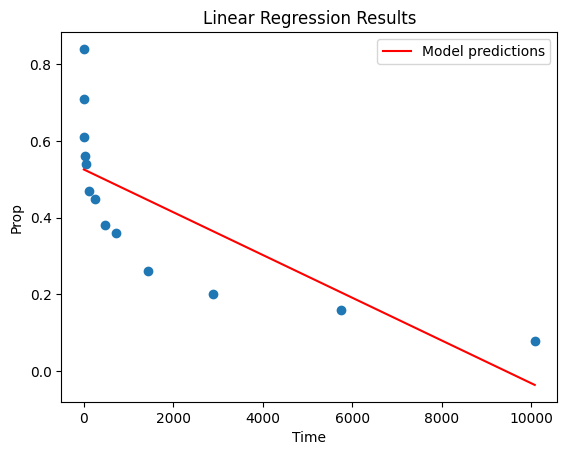

In [35]:
plt.scatter(X, y)
plt.plot(X, y_hat, color='red', label='Model predictions')
plt.xlabel('Time')
plt.ylabel('Prop')
plt.title('Linear Regression Results')
plt.legend();

The residuals vs. fits plot also suggests that the relationship is not linear:

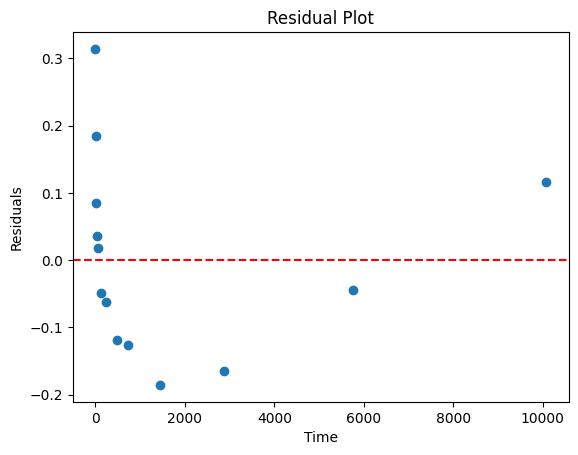

In [36]:
residuals = y - y_hat
residuals = residuals.to_numpy()

plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot');

Because the lack of linearity dominates the plot, we cannot use the plot to evaluate whether or not the variances are equal. We have to fix the non-linearity problem before we can assess the assumption of equal variances.

What about the normal probability plot of the residuals? What does it suggest about the error terms? Can we conclude that they are normally distributed?

**Note:** Their graph is slightly different and involves some sort of R programming library. I'm going to scavenge together some resources to best replicate tests for normality in data with Python.

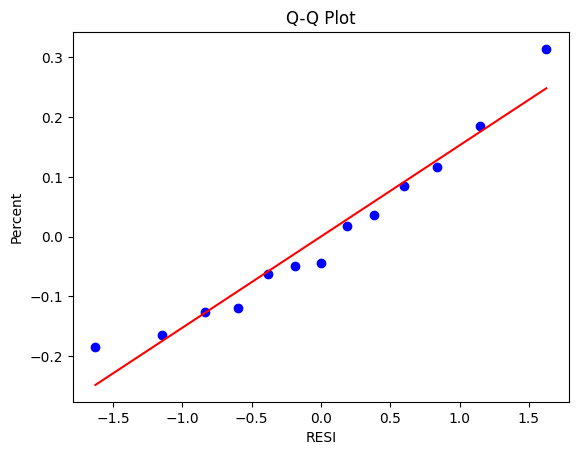

In [37]:
import scipy.stats as stats

stats.probplot(residuals.ravel(), dist="norm", plot=plt)
plt.xlabel('RESI')
plt.ylabel('Percent')
plt.title('Q-Q Plot')
plt.show();

I tried calculating the graph's associated statistics with limited success (I got about half of them correct). So, I'm just gonna move on for now and revisit the earlier Penn State lessons later. I think there's **a lot** of value in studying these statistical methods from such a credible source. Moreover, translating their R programming code into Python is **very** good practice.

Let's move on.

The Anderson-Darling P-value for this example is 0.643, which suggests that we fail to reject the null hypotheses of normal error terms. There isn't enough evidence to conclude that the errors terms are not normal.

In summary, we have a data set in which non-linearity is the only major problem. This situations screams out for transforming only the predictor's values. Before we do so, let's take an aside and discuss the **logarithmic transformation**, since it's the most common and most useful data transformation available.

The default logarithmic transformation merely involves taking the natural logarithm or each data value. Once could consider taking a different kind of logarithm, such as log base 10 or log base 2. However, the natural logarithm is the most common logarithmic scale used in scientific work.

The plot of the natural log function:

![Alt image](images/nat_log_func_graph.png)

suggests that the effects of taking the natural logarithm transformation are:
* Small values that are close together are spread further out.
* Large values that are spread out are brought closer together.

Let's use the natural logarithm to transform the *x* values in the memory retention experiment. Since *x* = time is the predictor, all we need to do is take the natural logarithm of each time value appearing in the data set. In doing so, we create a newly transformed predictor called `lntime`:

In [38]:
word_recall["lntime"] = np.log(word_recall['time'])
word_recall

,time,prop,lntime
0,1,0.84,0.000000
1,5,0.71,1.609438
2,15,0.61,2.708050
3,30,0.56,3.401197
4,60,0.54,4.094345
5,120,0.47,4.787492
6,240,0.45,5.480639
7,480,0.38,6.173786
8,720,0.36,6.579251
9,1440,0.26,7.272398


We take the natural logarithm for each value of time and place the results in their own column.

Now that we've transformed the predictor values, let's see if it helped correct the non-linear trend in the data. We refit the model with *y* = prop as the response and *x* = lntime as the predictor.

In [39]:
X = word_recall[['lntime']]
model = LinearRegression().fit(X, y)
y_hat = model.predict(X)
residuals = y - y_hat

Now let's recreate the plots from earlier:

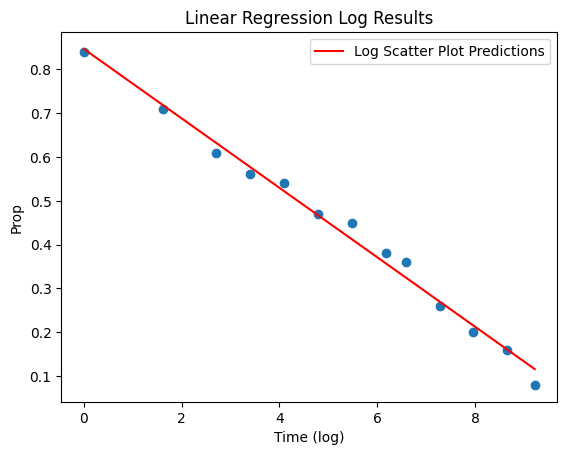

In [40]:
plt.scatter(X, y)
plt.plot(X, y_hat, color='red', label="Log Scatter Plot Predictions")
plt.xlabel('Time (log)')
plt.ylabel('Prop')
plt.title('Linear Regression Log Results')
plt.legend();